In [1]:
import pandas as pd 
import numpy as np 
import math
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/NFT%20Collections/nft_sales%20.csv")
df

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$3,328,148,500","1,079,811","9,755,511","2,656,431"
1,CryptoPunks,"$1,664,246,968","4,723","18,961","3,289"
2,Art Blocks,"$1,075,223,906","20,934","117,602","25,094"
3,Bored Ape Yacht Club,"$783,882,186","8,284","22,584","5,862"
4,NBA Top Shot,"$781,965,423","374,818","11,790,699","603,928"
...,...,...,...,...,...
245,Evolution,"$2,536,468",746,"4,961","2,061"
246,LegionPunks,"$2,535,490","1,702","3,794","2,410"
247,BabyApes,"$2,521,714","1,671","3,405","2,785"
248,Train of the Century,"$2,504,080","3,139","39,460","3,160"


In [3]:
df.describe()

,Collections,Sales,Buyers,Txns,Owners
count,250,250,250,250,244
unique,250,250,246,249,235
top,Axie Infinity,"$3,328,148,500","3,246","4,523",1
freq,1,1,2,2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       244 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [5]:
df.rename(columns = {'Sales':'Sales in USD','Txns':'Transactions'}, inplace = True)
df['Sales in USD'] = df['Sales in USD'].str.replace(',', '')
df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')
df['Buyers'] = df['Buyers'].str.replace(',','')
df['Transactions'] = df['Transactions'].str.replace(',','')
df['Owners'] = df['Owners'].str.replace(',','')
df=df.dropna()
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Collections,Sales in USD,Buyers,Transactions,Owners
0,Axie Infinity,3328148500,1079811,9755511,2656431
1,CryptoPunks,1664246968,4723,18961,3289
2,Art Blocks,1075223906,20934,117602,25094
3,Bored Ape Yacht Club,783882186,8284,22584,5862
4,NBA Top Shot,781965423,374818,11790699,603928
...,...,...,...,...,...
245,Evolution,2536468,746,4961,2061
246,LegionPunks,2535490,1702,3794,2410
247,BabyApes,2521714,1671,3405,2785
248,Train of the Century,2504080,3139,39460,3160


In [6]:
df['Sales in USD'] = df['Sales in USD'].astype('int64')
df['Buyers'] = df['Buyers'].astype('int64')
df['Transactions'] = df['Transactions'].astype('int64')
df['Owners'] = df['Owners'].astype('int32')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [7]:
df['100 mil club'] = np.where(df['Sales in USD']>=100000000, 'Yes', 'No')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
bored_collection = df[df['Collections'].str.contains("Bored")]


sum_sales = bored_collection['Sales in USD'].sum()

print(f"Total Sales of 'Bored Ape' Collection is {sum_sales:,}$")
bored_collection

Total Sales of 'Bored Ape' Collection is 982,841,231$


,Collections,Sales in USD,Buyers,Transactions,Owners,100 mil club
3,Bored Ape Yacht Club,783882186,8284,22584,5862,Yes
21,Bored Ape Kennel Club,108210267,5622,13715,5013,Yes
31,Bored Ape Chemistry Club,79456705,1454,2508,1,No
126,Bored Mummy Waking Up,11292073,6030,14816,3682,No


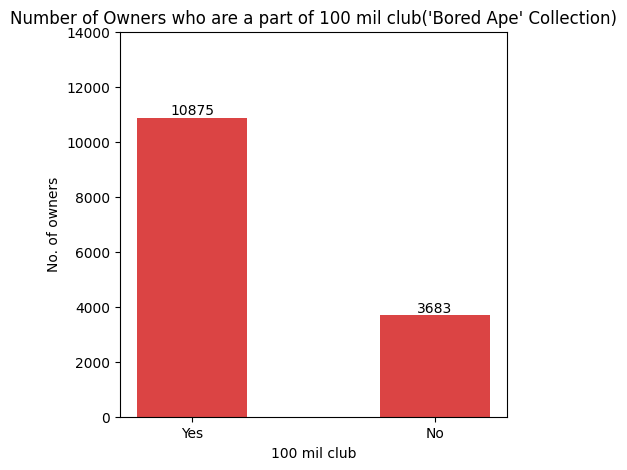

In [9]:
df2 = bored_collection.groupby('100 mil club').sum()
owners = [df2['Owners'][1],df2['Owners'][0]]
con = ['Yes','No']
plt.style.use('default')
plt.figure(figsize=(5,5))
p =plt.bar(con,owners,width=0.45,color='#db4444')
plt.ylim(0,14000)
plt.title("Number of Owners who are a part of 100 mil club('Bored Ape' Collection)")
plt.bar_label(p)
plt.xlabel('100 mil club')
plt.ylabel('No. of owners')
plt.show()

In [10]:
df_100 = df.loc[df['100 mil club'] == 'Yes']
average_sales_100 =round(df_100['Sales in USD'].mean())
df_no100 = df.loc[df['100 mil club'] == 'No']
average_sales_no100 = round(df_no100['Sales in USD'].mean())
print(f'Average sales of 100 million club is {average_sales_100:,}$')

Average sales of 100 million club is 457,926,711$


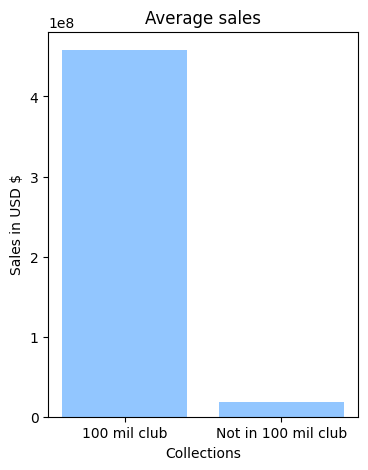

In [11]:
x= ['100 mil club','Not in 100 mil club']
avg = [average_sales_100,average_sales_no100]

plt.style.use('seaborn-pastel')
plt.figure(figsize=(4,5))

plt.bar(x,avg)
plt.title('Average sales')
plt.xlabel('Collections')
plt.ylabel('Sales in USD $')
plt.show()

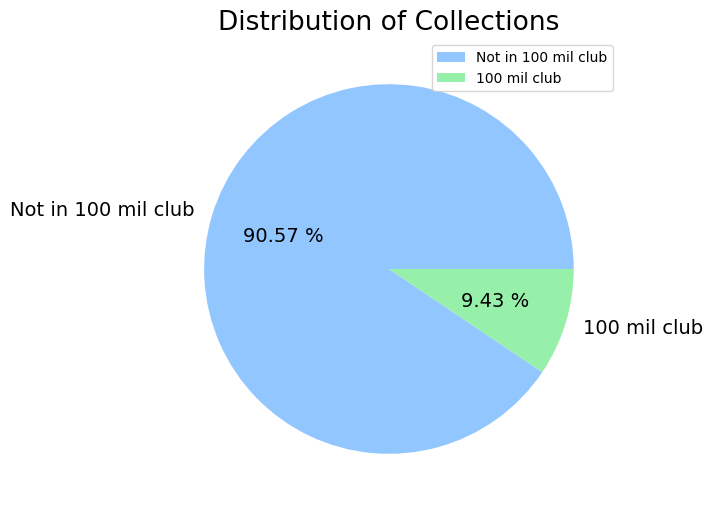

In [12]:
count = df.groupby(['100 mil club']).count()['Collections']
labels = ["Not in 100 mil club","100 mil club"]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(count,labels=labels,autopct='%.2f %%',textprops={'fontsize': 14})
plt.title("Distribution of Collections",fontdict={'fontsize': 19})
plt.legend(fontsize=10)
plt.show()

In [13]:
maximum_sale = df['Sales in USD'].max()
collection = df[df['Sales in USD'] == maximum_sale ]['Collections'][0]

print(f'The NFT Collection having maxiumum sales is {collection}')
print(f'Total sales of {collection} are {maximum_sale:,} USD')

The NFT Collection having maxiumum sales is Axie Infinity
Total sales of Axie Infinity are 3,328,148,500 USD


NBA Top Shot has 11790699 transactions (Highest amongst all)
CryptoPunks has 18961 transactions (Relatively lower transaction)


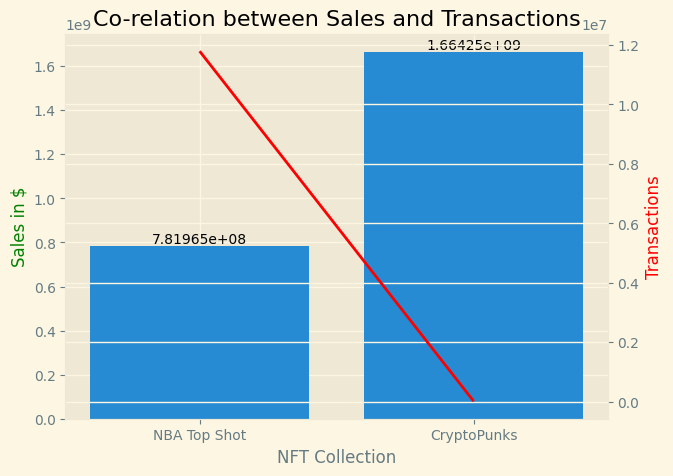

In [14]:
most_transaction  = df['Transactions'].max()
most_data = df[df['Transactions']==most_transaction]
collection_of_most = most_data['Collections'].iloc[0]
sales_of_most = most_data['Sales in USD'].iloc[0]

lower_transact = df.iloc[1][3]
collection_of_lower = df.iloc[1][0]
sales_of_lower = df.iloc[1][1]

print(f'{collection_of_most} has {most_transaction} transactions (Highest amongst all)')
print(f'{collection_of_lower} has {lower_transact} transactions (Relatively lower transaction)')

#LET'S VISUALIZE THIS USING GRAPHS
collections = [collection_of_most,collection_of_lower]
sales = [sales_of_most,sales_of_lower]
transactions = [most_transaction,lower_transact]

plt.style.use('Solarize_Light2')
fig,ax1 = plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
p = ax1.bar(collections,sales)
ax2.plot(collections,transactions,'r-')
ax1.bar_label(p)
plt.title('Co-relation between Sales and Transactions')
ax1.set_xlabel('NFT Collection')
ax1.set_ylabel('Sales in $',color='g')
ax2.set_ylabel('Transactions',color='r')
plt.show()